In [1]:
import pandas as pd
#untuk pembangunan model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/KELOMPOK IR/Preprocessing/Aspek2 sudah di preprocess/dataset_prepro.csv')
print(dataset.shape)
dataset.isna().sum()

(1714, 19)


Unnamed: 0                0
id_review                 0
attractions_clean_text    0
amenities_clean_text      0
access_clean_text         0
price_clean_text          0
no_aspect_clean_text      6
review_clean              3
review                    0
attractions               0
amenities                 0
access                    0
price                     0
no_aspect                 0
attractions_text          0
amenities_text            0
access_text               0
price_text                0
no_aspect_text            0
dtype: int64

In [5]:
dataset.head()

Unnamed: 0                             id_review  \
0           0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1           1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2           2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3           5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4           6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   

                              attractions_clean_text  \
0                                               none   
1  lari tonton matahari terbit indah jalan inna g...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                                amenities_clean_text access_clean_text  \
0                                               none              none   
1  jalan nikmat hidang lokal jalan nikmat hidang ...              none   
2                                               none              none   
3                                               none              none   
4                                               none              none   

                                    price_clean_text  \
0                                               none   
1                                               none   
2  lokasi pas liat sunrise jam santai bayar parki...   
3                                               none   
4                                               none   

                                no_aspect_clean_text  \
0  suka bal area keluarga cinta jalan bal tawar a...   
1  jalan pantai sanur sabtu kadang kadang jumat s...   
2                                               none   
3                                               none   
4                                               none   

                                        review_clean  \
0  suka bal area keluarga cinta jalan bal tawar a...   
1  jalan pantai sanur sabtu kadang kadang jumat s...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                                              review  attractions  amenities  \
0  Suka Bali - area keluarga yang luar biasa\nmen...            0          0   
1  Saya selalu berjalan di Pantai Sanur pada hari...            3          2   
2  Lokasi paling pas liat sunrise..harus datang s...            3          0   
3  Tempatnya bagus, selalu ramai oleh pengunjung....            3          0   
4  pantai sanur banyak menyimpan misteri dan sang...            3          0   

   access  price  no_aspect  \
0       0      0          2   
1       0      0          3   
2       0      3          0   
3       0      0          0   
4       0      0          0   

                                    attractions_text  \
0                                               none   
1  Anda dapat berlari dan menonton matahari terbi...   
2  Lokasi paling pas liat sunrise..harus datang s...   
3  Tempatnya bagus, selalu ramai oleh pengunjung....   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                      amenities_text access_text  \
0                                               none        none   
1  Setelah Anda berjalan anda dapat menikmati hid...        none   
2                                               none        none   
3                                               none        none   
4                                               none        none   

                                          price_text  \
0                                               none   
1                                               none   
2  Lokasi paling pas liat sunrise..harus datang s...   
3                                               none   
4                                               none   

                                      no_aspect_text  
0  Suka Bali - area keluarga yang luar biasa menc...  
1  Saya selalu ber

In [6]:
df_attractions = dataset[dataset['attractions'] != 0]
df_attractions = df_attractions[['attractions_clean_text','attractions']]

In [7]:
df_attractions['attractions'] = df_attractions['attractions'].replace({1: 'negative', 2: 'neutral', 3: 'positive'})

In [8]:
df_attractions.to_excel('[02] dataset_attractions.xlsx')

In [9]:
df_attractions.isna().sum()

attractions_clean_text    0
attractions               0
dtype: int64

In [10]:
df_attractions = df_attractions.dropna()

In [11]:
df_attractions.isna().sum()

attractions_clean_text    0
attractions               0
dtype: int64

In [12]:
df_attractions.head()

attractions_clean_text attractions
1  lari tonton matahari terbit indah jalan inna g...    positive
2  lokasi pas liat sunrise jam santai bayar parki...    positive
3  tempat bagus ramai unjung salah pantai favorit...    positive
4  pantai sanur simpan misteri unjung lokal asing...    positive
5  pantai bersih ramai pantai bersih ramai pantai...    positive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Aspect Classification (Attraction)

## K-Fold Cross Validation

Di dalam konteks machine learning dan pengolahan data, "pipeline" adalah istilah yang digunakan untuk menggambarkan rangkaian langkah pemrosesan data dan model pembelajaran mesin yang diterapkan secara berurutan. Pipeline membantu dalam mengotomatisasi alur kerja dan memastikan bahwa urutan operasi yang sama diterapkan pada data selama pelatihan model dan prediksi. Penggunaan pipeline sangat berguna untuk menjaga konsistensi dan menghindari kesalahan yang mungkin terjadi jika setiap langkah diproses secara terpisah.

Dalam kode yang disediakan sebelumnya, pipeline dibuat menggunakan fungsi `make_pipeline` dari library scikit-learn. Ini menggabungkan dua komponen utama:

1. **TF-IDF Vectorizer**: Ini mengubah teks mentah menjadi format vektor numerik yang dapat diproses oleh model machine learning. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik umum yang digunakan dalam pemrosesan teks untuk mengubah teks menjadi fitur numerik. Ini membantu dalam mengukur seberapa penting sebuah kata dalam dokumen dalam kumpulan data.

2. **Model Pembelajaran Mesin**: Ini adalah algoritma pembelajaran mesin yang Anda pilih untuk mengklasifikasikan data. Dalam contoh Anda, model ini adalah Naive Bayes, KNN, SVM, dan Rocchio.

Dengan menggabungkan kedua komponen ini dalam satu pipeline, langkah-langkah seperti vektorisasi teks dan pelatihan/prediksi model dapat dilakukan secara bersamaan, yang mempercepat proses dan mengurangi kemungkinan kesalahan.

Saat Anda memanggil `pipeline.fit` dengan data pelatihan, pipeline secara otomatis menerapkan vektorisasi TF-IDF pada teks dan kemudian melatih model yang ditentukan dengan data yang telah diubah. Demikian pula, saat `pipeline.predict` dipanggil, teks input akan di-vektorisasi terlebih dahulu sebelum diaplikasikan ke model yang telah dilatih untuk membuat prediksi.

In [14]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import make_pipeline

# TF-IDF vectorization
vectorizer = TfidfVectorizer()

# X dan Y
X = df_attractions['attractions_clean_text']
y = df_attractions['attractions']

# Model
models = {
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': svm.SVC(kernel='linear'),
    'Rocchio': NearestCentroid()
}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Classification report
classification_reports = {}

# Run cross validation utk setiap model
for name, model in models.items():
    pipeline = make_pipeline(vectorizer, model)
    y_pred = cross_val_predict(pipeline, X, y, cv=kf)
    report = classification_report(y, y_pred)
    classification_reports[name] = report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Menghitung confusion matrix untuk setiap model
confusion_matrices = {}
for name, model in models.items():
    pipeline = make_pipeline(vectorizer, model)
    y_pred = cross_val_predict(pipeline, X, y, cv=kf)
    conf_mat = confusion_matrix(y, y_pred)
    confusion_matrices[name] = conf_mat

# Menampilkan confusion matrix untuk setiap model
for name, conf_mat in confusion_matrices.items():
    print(f"Confusion Matrix for {name}:\n{conf_mat}\n")


Confusion Matrix for Naive Bayes:
[[   2    0  168]
 [   0    0   24]
 [   0    0 1244]]

Confusion Matrix for KNN:
[[  55    0  115]
 [   3    0   21]
 [   7    0 1237]]

Confusion Matrix for SVM:
[[  81    0   89]
 [   2    0   22]
 [  10    0 1234]]

Confusion Matrix for Rocchio:
[[ 114    7   49]
 [   7    4   13]
 [  40   37 1167]]



In [16]:
print(classification_reports['Naive Bayes'])

              precision    recall  f1-score   support

    negative       1.00      0.01      0.02       170
     neutral       0.00      0.00      0.00        24
    positive       0.87      1.00      0.93      1244

    accuracy                           0.87      1438
   macro avg       0.62      0.34      0.32      1438
weighted avg       0.87      0.87      0.81      1438



In [17]:
print(classification_reports['Rocchio'])

              precision    recall  f1-score   support

    negative       0.71      0.67      0.69       170
     neutral       0.08      0.17      0.11        24
    positive       0.95      0.94      0.94      1244

    accuracy                           0.89      1438
   macro avg       0.58      0.59      0.58      1438
weighted avg       0.91      0.89      0.90      1438



In [18]:
print(classification_reports['KNN'])

              precision    recall  f1-score   support

    negative       0.85      0.32      0.47       170
     neutral       0.00      0.00      0.00        24
    positive       0.90      0.99      0.95      1244

    accuracy                           0.90      1438
   macro avg       0.58      0.44      0.47      1438
weighted avg       0.88      0.90      0.87      1438



In [19]:
print(classification_reports['SVM'])

              precision    recall  f1-score   support

    negative       0.87      0.48      0.62       170
     neutral       0.00      0.00      0.00        24
    positive       0.92      0.99      0.95      1244

    accuracy                           0.91      1438
   macro avg       0.60      0.49      0.52      1438
weighted avg       0.90      0.91      0.90      1438



## Export Model

In [20]:
import joblib
# Train dan simpan model (ini untuk web prediksi yagesya)
def train_and_save_model(model, name, X, y, vectorizer):
    pipeline = make_pipeline(vectorizer, model)
    pipeline.fit(X, y)
    model_path = f'{name}_model.joblib'  # Simpan di direktori
    joblib.dump(pipeline, model_path)
    return model_path

# Train dan simpan model ke lokal Google Collab
saved_model_paths = {}
for name, model in models.items():
    model_path = train_and_save_model(model, name, X, y, vectorizer)
    saved_model_paths[name] = model_path

saved_model_paths

{'Naive Bayes': 'Naive Bayes_model.joblib',
 'KNN': 'KNN_model.joblib',
 'SVM': 'SVM_model.joblib',
 'Rocchio': 'Rocchio_model.joblib'}

## Visualisasi Confusion Matrix

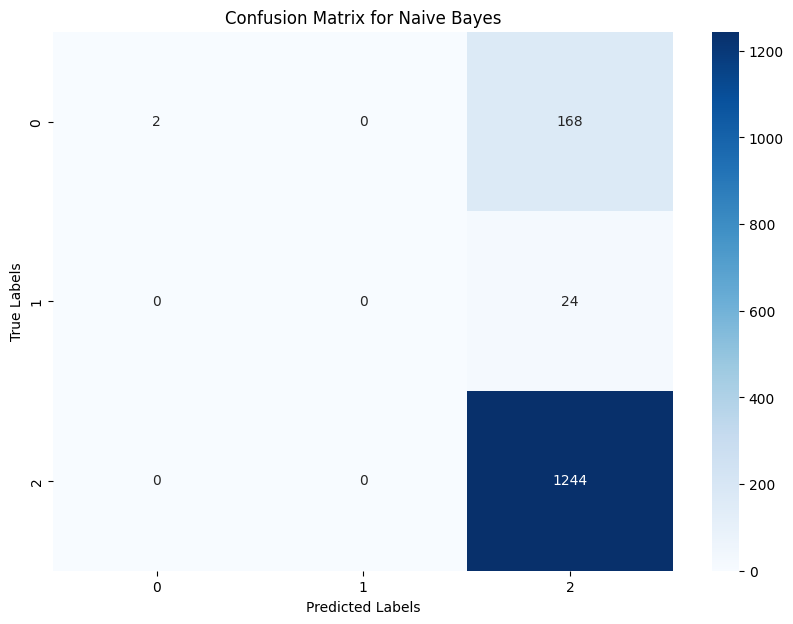

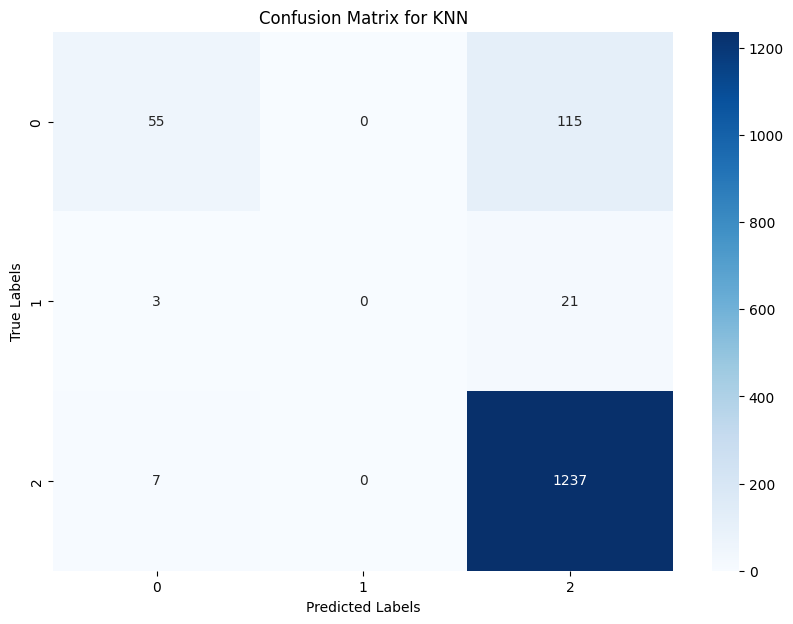

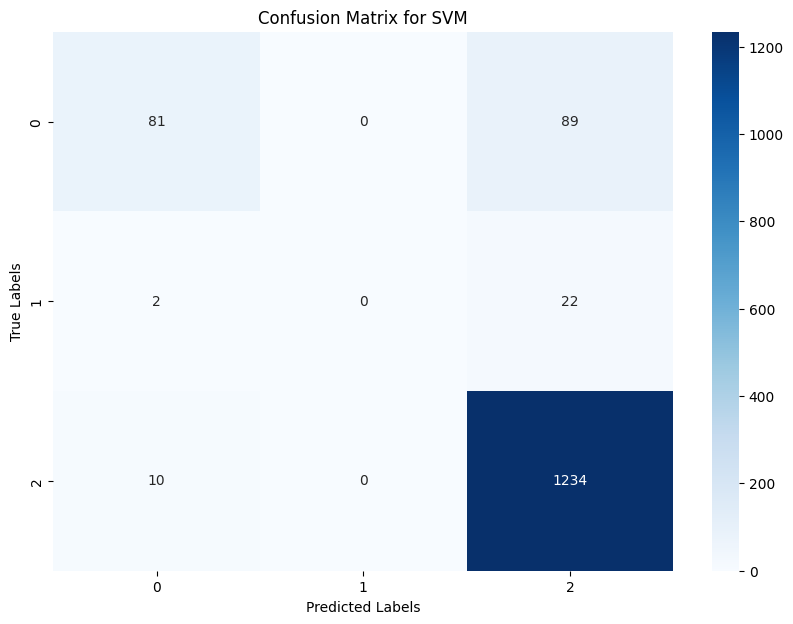

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menghitung confusion matrix dengan cross-validation
def compute_confusion_matrix(model, X, y, cv):
    y_pred = cross_val_predict(model, X, y, cv=cv)
    conf_mat = confusion_matrix(y, y_pred)
    return conf_mat

# Menghitung confusion matrix untuk setiap model
confusion_matrices = {}
for name, model in models.items():
    pipeline = make_pipeline(vectorizer, model)
    conf_mat = compute_confusion_matrix(pipeline, X, y, kf)
    confusion_matrices[name] = conf_mat

# Visualisasi confusion matrix
for name, conf_mat in confusion_matrices.items():
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
